비율로 작성된 json 파일에서 label을 불러와 매치되는 이미지 위에 색을 채워 표기하고, 저장.

[[[203 195 202]
  [203 195 202]
  [203 195 202]
  ...
  [ 57  60  64]
  [ 57  56  60]
  [ 52  51  55]]

 [[204 196 203]
  [204 196 203]
  [204 196 203]
  ...
  [ 42  45  49]
  [ 41  42  46]
  [ 41  40  44]]

 [[204 196 203]
  [204 196 203]
  [204 196 203]
  ...
  [ 34  37  41]
  [ 36  37  41]
  [ 35  36  40]]

 ...

 [[210 199 202]
  [209 198 201]
  [209 198 201]
  ...
  [ 26  11   8]
  [ 25  10   7]
  [ 25  10   7]]

 [[210 199 202]
  [209 198 201]
  [209 198 201]
  ...
  [ 26  11   8]
  [ 25  10   7]
  [ 25  10   7]]

 [[210 199 202]
  [209 198 201]
  [209 198 201]
  ...
  [ 26  11   8]
  [ 25  10   7]
  [ 25  10   7]]]


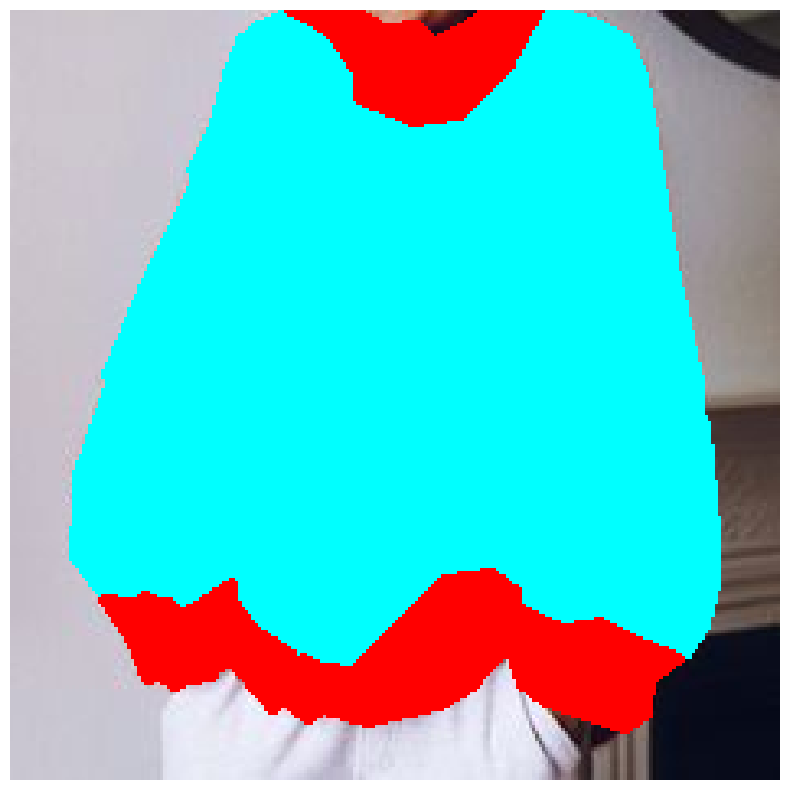

In [ ]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
import os

# JSON 데이터 로드

# 색상 정의 (category_id별 색상)
category_colors = {
    0: (0, 255, 255),  # 청록
    1: (255, 0, 0),  # 빨강
    2: (0, 255, 0),  # 초록
    3: (0, 0, 255),  # 파랑
    4: (255, 255, 0), # 노랑
    5: (255, 20, 147) #핑크
}
DATA_NUM=1
for i in range(1,DATA_NUM+1):
    # input_file_path = 'json-new/{}.json'.format(i)
    input_file_path = 'image_{}.json'.format(i)
    with open(input_file_path, 'r') as file:
        json_data = json.load(file)

    # 이미지 파일 이름 추출
    if(len(json_data["annotations"])==0):
        continue

    image_name = json_data["annotations"][0]["image_name"] #json 에 들어 있는 image name과 매치
    # 이미지 로드
    image = cv2.imread("./64.jpg")
    if image is None:
        print(f"이미지를 찾을 수 없습니다:")
        exit()
    print(image)
    # 이미지 크기
    height, width, _ = image.shape

    # 다각형 그리기
    for annotation in json_data["annotations"]:
        category_id = annotation["category_id"]
        polygon = annotation["polygon"]

        # 색상 선택
        color = category_colors.get(category_id, (255, 255, 255))  # 기본 색상: 흰색

        # 다각형 좌표를 픽셀 단위로 변환
        points = np.array([
            [int(x*width), int(y*height)] for x, y in polygon
        ], dtype=np.int32)

        # 다각형 그리기
        cv2.polylines(image, [points], isClosed=True, color=color, thickness=2)
        cv2.fillPoly(image, [points], color=color)

    # 이미지를 Matplotlib으로 출력
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    image_name = "{}.jpg".format(i)
    output_path = os.path.join("newimage", f"annotated_{image_name}.jpg")

    # 이미지 저장
    cv2.imwrite(f"annotated_{image_name}", image)

이미지를 정방향으로 자르는 코드

In [ ]:

for i in range(1,DATA_NUM+1):
    input_file_path = 'image_{}.json'.format(i)
    with open(input_file_path, 'r') as file:
        json_data = json.load(file)
    # 이미지 파일 이름 추출
    if(len(json_data["annotations"])==0):
        continue
    # print(json_data["annotations"][0]["image_name"]

    image_name = json_data["annotations"][0]["image_name"]
    # 이미지 로드
    image = cv2.imread("./{}.jpg".format(i))

    if image is None:
        print(f"이미지를 찾을 수 없습니다: {image_name}")
        exit()

    # 이미지 크기
    height, width, _ = image.shape

    image_name = "{}.jpg".format(i)
    output_path1 = os.path.join("cropped", image_name)
    image2 = cv2.imread("annotated_{}.jpg".format(i))
    output_path2 = os.path.join("cropped", f"annotated_{image_name}")

    # 정사각형 크기 결정 (가로와 세로 중 작은 값 선택)
    square_size = min(height, width)

    # 중앙 기준으로 정사각형 크롭 좌표 계산
    start_x = (width - square_size) // 2
    start_y = 0
    end_x = start_x + square_size
    end_y = square_size
    print(i,": ",square_size)
    
    # 이미지 크롭
    cropped_img1 = image[start_y:end_y, start_x:end_x]
    cropped_img2 = image2[start_y:end_y, start_x:end_x]

    # 이미지 저장
    cv2.imwrite(image_name+"_crop", cropped_img1)
    cv2.imwrite( f"annotated_{image_name}", cropped_img2)

64 :  236


In [ ]:
!zip -r label_crop.zip newimage/

  adding: newimage/ (stored 0%)
  adding: newimage/annotated_103.jpg (deflated 8%)
  adding: newimage/annotated_064.jpg (deflated 32%)
  adding: newimage/annotated_028.jpg (deflated 2%)
  adding: newimage/annotated_069.jpg (deflated 4%)
  adding: newimage/annotated_049.jpg (deflated 14%)
  adding: newimage/annotated_026.jpg (deflated 20%)
  adding: newimage/annotated_088.jpg (deflated 7%)
  adding: newimage/annotated_021.jpg (deflated 12%)
  adding: newimage/annotated_073.jpg (deflated 3%)
  adding: newimage/annotated_077.jpg (deflated 8%)
  adding: newimage/annotated_072.jpg (deflated 17%)
  adding: newimage/annotated_098.jpg (deflated 3%)
  adding: newimage/annotated_058.jpg (deflated 25%)
  adding: newimage/annotated_095.jpg (deflated 1%)
  adding: newimage/annotated_001.jpg (deflated 2%)
  adding: newimage/annotated_014.jpg (deflated 50%)
  adding: newimage/annotated_057.jpg (deflated 40%)
  adding: newimage/annotated_091.jpg (deflated 5%)
  adding: newimage/annotated_020.jpg (defl

In [ ]:
!zip -r image_crop.zip data/

  adding: data/ (stored 0%)
  adding: data/025.jpg (deflated 2%)
  adding: data/050.jpg (deflated 1%)
  adding: data/081.jpg (deflated 6%)
  adding: data/004.jpg (deflated 1%)
  adding: data/069.jpg (deflated 7%)
  adding: data/101.jpg (deflated 6%)
  adding: data/105.jpg (deflated 6%)
  adding: data/006.jpg (deflated 1%)
  adding: data/035.jpg (deflated 1%)
  adding: data/103.jpg (deflated 6%)
  adding: data/073.jpg (deflated 6%)
  adding: data/012.jpg (deflated 1%)
  adding: data/001.jpg (deflated 8%)
  adding: data/079.jpg (deflated 5%)
  adding: data/042.jpg (deflated 40%)
  adding: data/109.jpg (deflated 5%)
  adding: data/106.jpg (deflated 5%)
  adding: data/070.jpg (deflated 6%)
  adding: data/108.jpg (deflated 6%)
  adding: data/026.jpg (deflated 1%)
  adding: data/066.jpg (deflated 5%)
  adding: data/065.jpg (deflated 6%)
  adding: data/090.jpg (deflated 5%)
  adding: data/008.jpg (deflated 8%)
  adding: data/033.jpg (deflated 1%)
  adding: data/080.jpg (deflated 4%)
  adding:

In [ ]:
from google.colab import files
files.download('label_crop.zip')
files.download('image_crop.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>